<a href="https://colab.research.google.com/github/joshimohitm9/Projects/blob/main/3)_spam_Email_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from logging import warning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
link="https://raw.githubusercontent.com/NStugard/Intro-to-Machine-Learning/main/spam.csv"

In [3]:
df=pd.read_csv(link)
df.sample(5)

,Category,Message
4152,ham,Ü comin to fetch us oredi...
1617,ham,"K, makes sense, btw carlos is being difficult ..."
5111,ham,I've reached sch already...
1648,ham,Evening * v good if somewhat event laden. Will...
4184,ham,"Sorry, I'll call later in meeting"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.shape

(5572, 2)

In [6]:
df["Category"].unique()

array(['ham', 'spam'], dtype=object)

In [7]:
df[df["Category"]=="spam"].agg("count")

Category    747
Message     747
dtype: int64

In [8]:
df[df["Category"]=="ham"].agg("count")

Category    4825
Message     4825
dtype: int64

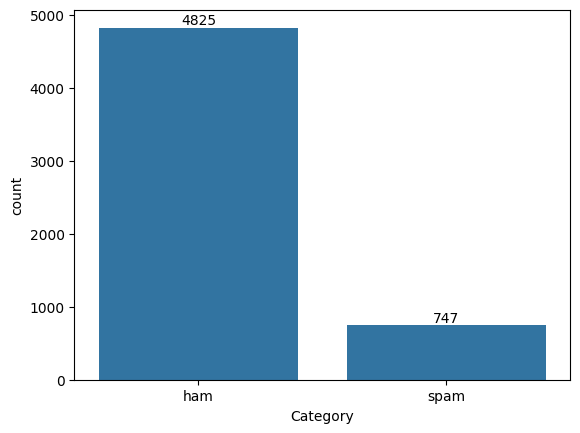

In [9]:
a=sns.countplot(x=df["Category"])
for bars in a.containers:
    a.bar_label(bars)
plt.show()

In [10]:
spam=df[df["Category"]=="spam"]
ham=df[df["Category"]=="ham"]

In [11]:
len(ham)

4825

In [12]:
import random
spam_list=[]
for i in spam["Message"]:
  spam_list.append(i)
spam_msg= [random.choice(spam_list) for i in range(0,len(ham))]


In [13]:
spam=pd.DataFrame(spam_msg,columns=["Message"])
spam["spam"]=spam["Message"].apply(lambda x: 1 if len(x)>1 else 0)

In [14]:
spam["spam"].count()

4825

In [15]:
ham["spam"]=ham["Message"].apply(lambda x: 0 if len(x)>1 else 1 )
ham.drop(columns=["Category"],inplace=True)

In [16]:
df_final=pd.concat([spam,ham])

In [17]:
df_final.sample(5)

,Message,spam
5254,I didnt get anything da,0
1873,Urgent! Please call 09066612661 from your land...,1
4802,The guy at the car shop who was flirting with ...,0
2489,Aiyah e rain like quite big leh. If drizzling ...,0
3071,SplashMobile: Choose from 1000s of gr8 tones e...,1


In [18]:
x=df_final["Message"]
y=df_final["spam"]

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7720,), (1930,), (7720,), (1930,))

In [21]:
y_train

1752    0
503     1
5483    0
5251    0
1495    1
       ..
1602    0
501     1
2273    0
4444    1
4338    0
Name: spam, Length: 7720, dtype: int64

In [22]:
x_train.values

array(['* Was thinking about chuckin ur red green n black trainners 2 save carryin them bac on train',
       'You are a winner U have been specially selected 2 receive £1000 or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810910p/min (18+)',
       'So li hai... Me bored now da lecturer repeating last weeks stuff waste time...',
       ...,
       "Haha awesome, I've been to 4u a couple times. Who all's coming?",
       'SMS AUCTION You have won a Nokia 7250i. This is what you get when you win our FREE auction. To take part send Nokia to 86021 now. HG/Suite342/2Lands Row/W1JHL 16+',
       'on a Tuesday night r u 4 real'], dtype=object)

In [23]:
cv=CountVectorizer()
x_train_transformed=cv.fit(x_train.values)
x_train_transformed=cv.transform(x_train.values).toarray()
x_test_transformed=cv.transform(x_test.values).toarray()

In [24]:
x_train_transformed

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
MNB=MultinomialNB()
MNB.fit(x_train_transformed,y_train)

MultinomialNB()

In [36]:
MNB.score(x_test_transformed,y_test)*100

98.96373056994818

In [40]:
y_pred = MNB.predict(x_test_transformed)

In [41]:
accuracy_score(y_test,y_pred)

0.9896373056994818

<Axes: >

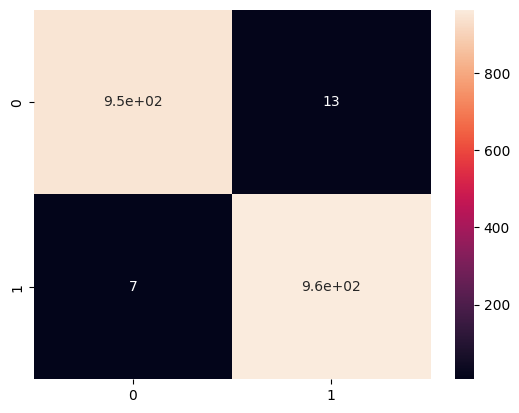

In [44]:
a=confusion_matrix(y_pred,y_test)
sns.heatmap(a,annot=True)

In [65]:
a=str(input(": "))
b=a.split()
token_input=cv.transform(b)
c=MNB.predict(token_input)
if c[0]==1:
  print("Spam")
else:
  print("Ham")

:  Snapdeal has sent this e-mail to you because your subscription preferences indicate that you want to receive alerts on this email address. Click here to unsubscribe
Ham
